In [1]:
import numpy as np
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
import japanize_matplotlib
from jax.example_libraries import optimizers

In [2]:
rng = jax.random.PRNGKey(42)
rng, subkey = jax.random.split(rng, num=2)

m = 100 
a = jax.random.normal(subkey,(m,))
n = 50 
d = 10

In [3]:
rng, subkey = jax.random.split(rng, num=2)
G = jax.random.normal(subkey, (d,d))
X = jnp.zeros((d, n))
Y = jnp.zeros(n)

In [4]:
for j in range(n):
    rng, subkey = jax.random.split(rng, num=2)
    x = jax.random.normal(subkey, (d,))
    x = x/jnp.linalg.norm(x)
    y = x.T@G@x
    X = X.at[:,j].set(x)

In [7]:
def f(W, x):
    return (jnp.sum(jnp.tile(a.reshape(len(a),1),x.shape[-1]) * jax.nn.relu(W.T @ x), axis=0))/jnp.sqrt(m)

In [8]:
def L(W):
    return 0.5*jnp.linalg.norm(f(W, X) - Y)**2

In [16]:
# @jax.jit
def step(L, W):
    gs = jax.grad(L)(W)
    return W - eta*gs
    
def GD(max_itr, eta):
    rng = jax.random.PRNGKey(0)
    W = jax.random.normal(subkey, (d,m))
    ret_list = jnp.zeros(max_itr)
    for i in range(max_itr):
        W = step(L, W)
        ret_list = ret_list.at[i].set(L(W))
        # print(ret_list[i])
    return ret_list

In [17]:
eta = 0.9
max_itr = 200
L_list = GD(max_itr, eta)

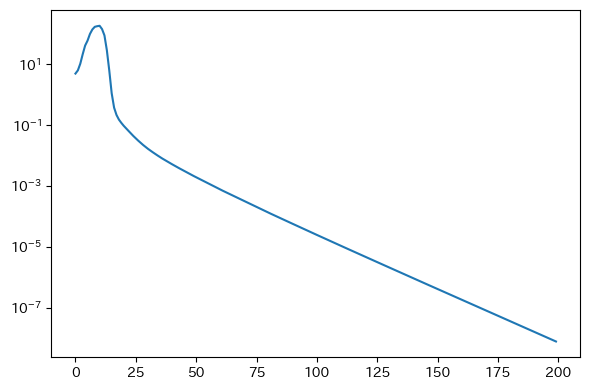

In [18]:
fig = plt.figure(figsize=(6, 4), tight_layout=True)
ax = fig.add_subplot(111, yscale="log")
ax.plot(range(max_itr), L_list);